In [4]:
# Code generated from tutorial by Mark Jay: https://www.youtube.com/watch?v=fSM6cdFQdwI&t=436s

import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np
# used for exporting
import csv
# used for getting file paths
import os

%config InlineBackend.figure_format = 'svg'

In [5]:
'''options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
}'''
''''gpu': 1.0''' 

options = {
    'model': 'cfg/tiny-yolo-7c.cfg',
    'load': 29250,
    'threshold': 0.2,
    'labels': 'labelsAll.txt'
}

'''  'labels': 'labelsMATLABannotations.txt'  '''
tfnet = TFNet(options)

Parsing cfg/tiny-yolo-7c.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256)
 Init  |  Ye

In [6]:
ImPath = 'C:\\Users\\benmi\\Documents\\Thesis\\Thesis Instructions\\Raw Data\\All_Combined\\Validation\\'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(ImPath):
    for file in f:
        if '.jpg' in file:
            #files.append(os.path.join(r, file))
            files.append(file)

for f in files:
    print(f)


frame_1004.jpg
frame_1012.jpg
frame_1019.jpg
frame_1024.jpg
frame_1032.jpg
frame_1039.jpg
frame_104.jpg
frame_1044.jpg
frame_1052.jpg
frame_1059.jpg
frame_1064.jpg
frame_1072.jpg
frame_1079.jpg
frame_1084.jpg
frame_1092.jpg
frame_1099.jpg
frame_1104.jpg
frame_1112.jpg
frame_1119.jpg
frame_112.jpg
frame_1124.jpg
frame_1132.jpg
frame_1139.jpg
frame_1144.jpg
frame_1152.jpg
frame_1159.jpg
frame_1164.jpg
frame_1172.jpg
frame_1179.jpg
frame_1184.jpg
frame_119.jpg
frame_1192.jpg
frame_1199.jpg
frame_12.jpg
frame_1204.jpg
frame_1212.jpg
frame_1219.jpg
frame_1224.jpg
frame_1232.jpg
frame_1239.jpg
frame_124.jpg
frame_1244.jpg
frame_1252.jpg
frame_1259.jpg
frame_1264.jpg
frame_1272.jpg
frame_1279.jpg
frame_1284.jpg
frame_1292.jpg
frame_1299.jpg
frame_1304.jpg
frame_1312.jpg
frame_1319.jpg
frame_132.jpg
frame_1324.jpg
frame_1332.jpg
frame_1339.jpg
frame_1344.jpg
frame_1352.jpg
frame_1359.jpg
frame_1364.jpg
frame_1372.jpg
frame_1379.jpg
frame_1384.jpg
frame_139.jpg
frame_1392.jpg
frame_1399.jpg
fra

In [8]:
CSVpath = 'C:\\Users\\benmi\\Documents\\Thesis\\Thesis Instructions\\Raw Data\\Detected_CSV_Results\\'
#ImPath = 'C:\\Users\\benmi\\darkflow-master\\darkflow-master\\HessSingleFrame\\'

# Save the results to a .csv file or something I can get to later using Matlab
# https://www.programiz.com/python-programming/working-csv-files

for f in files:
    img = cv2.imread(ImPath+f, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = tfnet.return_predict(img)

    # img.shape
    # results
    
    # Save the results to a .csv file or something I can get to later using Matlab
    # https://www.programiz.com/python-programming/working-csv-files    
    
    with open(CSVpath+f[:-4]+'.csv', 'w') as csvFile:
        fields = ['label','confidence','topleft','bottomright']
        writer = csv.DictWriter(csvFile,fieldnames=fields) #,dialect='myDialect')
        writer.writeheader()
        writer.writerows(results)
    
    csvFile.close()
    results

In [9]:
files[1][:-4]+'.csv'
files[1][:47]+'.csv'
len(files[1])

14

[{'label': 'PDC',
  'confidence': 0.3219831,
  'topleft': {'x': 145, 'y': 199},
  'bottomright': {'x': 168, 'y': 259}}]

"\ntopleft = (result[0]['topleft']['x'], result[0]['topleft']['y'])\nbottomright = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])\nlabel = result[0]['label']\nconfidence = result[0]['confidence']\n\nimg = cv2.rectangle(img, topleft, bottomright, (0, 255, 0), 7) \ncomment this last thing is colour and line width\nimg = cv2.putText(img, str(confidence), bottomright, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)\ncomment this last thing is font size and color and line width\n\nplt.imshow(img)\nplt.show\n"

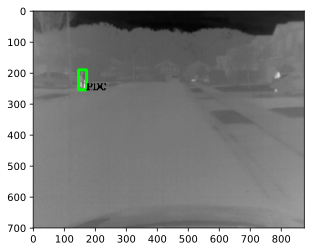

In [10]:
colors = [tuple(255 * np.random.rand(3)) for i in range(100)]
for color, result in zip(colors, results):
    
    topleft = (result['topleft']['x'], result['topleft']['y'])
    bottomright = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
    img = cv2.rectangle(img, topleft, bottomright, (0, 255, 0), 7) 
    img = cv2.putText(img, label, bottomright, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)


plt.imshow(img)
plt.show

'''
topleft = (result[0]['topleft']['x'], result[0]['topleft']['y'])
bottomright = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']
confidence = result[0]['confidence']

img = cv2.rectangle(img, topleft, bottomright, (0, 255, 0), 7) 
comment this last thing is colour and line width
img = cv2.putText(img, str(confidence), bottomright, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)
comment this last thing is font size and color and line width

plt.imshow(img)
plt.show
'''